<a href="https://colab.research.google.com/github/saeedahmadicp/Machine-Learning-and-Deep-Learning/blob/main/final_task(Diabetes_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRT565 Assessment 2**

This task is consists of the following modules:

**1) Dataset Loading**

**2) Dataset Statistics**

**3) Dataset Preprocessing**

**4) Feature Engineering**

**5) Data Splitting**

**6) Machine Learning Algorithms**

>**6.1) Decesion Tree**

>**6.2) Random Forest**

>**6.3) K-Nearest Neighbours**


**7) Deep Learning Algorithms**

>**7.1) Multilayer Artifical Neural Networks**

>**7.2) Recurent Neural Network (RNN)**

**8) Overall models evaluation and comparisons**


## **Importing the Necessary Python Modules**

In [ ]:
#modules for loading and processing dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#modules for calculating the time for the training of the model
import time 

#modules for visualizing dataset
import seaborn as sns
import matplotlib.pyplot as plt

#modules for machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for finding the feature importances
from sklearn.ensemble import ExtraTreesClassifier


#modules for implementing deep learning 
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier

#modules for evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.model_selection import train_test_split


#modules for cross-validation and tuning the hyperparameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#modules for viualizing the decision tree model
!pip install dtreeviz
from dtreeviz.trees import dtreeviz


     |████████████████████████████████| 61 kB 476 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.1-py3-none-any.whl size=67694 sha256=22ff20dc87eaaab4870b3b534c103f13787220d30de5ae9dc03de432e93b0af7
  Stored in directory: /root/.cache/pip/wheels/f4/e0/4c/26144f03fd05b7c3d82e5cf2679c2d6bd9d9b730548264674d
Successfully built dtreeviz


## **1) Dataset Loading**

In [ ]:
#initializing the path for the dataset
path = "diabetes.csv"

#loading the dataset
data = pd.read_csv(path)

## **2) Dataset Statistics**

In [ ]:
#number of instances
len(data['Outcome'])

768

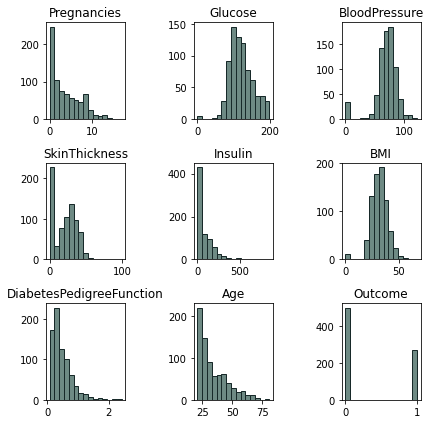

In [ ]:
#plotting histogram for each feature, the x-axis show the vlaues of the features while 
#the y-axis shows the frequency for each value 
data.hist(bins=15, color='#6e8a84', edgecolor='#172929', linewidth=1.0, grid=False)
plt.tight_layout()

In [ ]:
#printing the columns (i.e. features) of the datasets
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

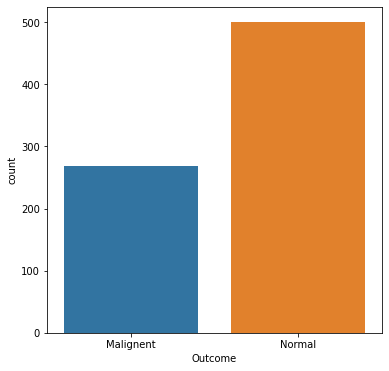

In [ ]:
#ploting the count for each value in the target
data_test = data
data_test['Outcome'] = data_test['Outcome'].replace({0: "Normal", 1: "Malignent"})
sns.countplot(x='Outcome', data=data_test)

In [ ]:
#five five columns of the dataset
data.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

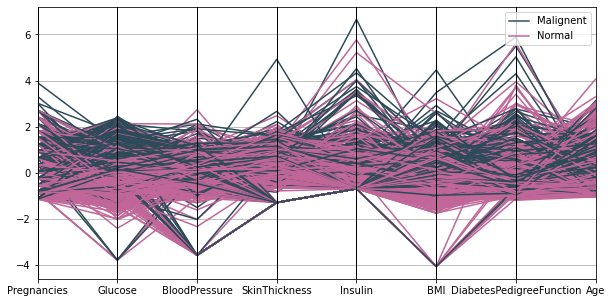

In [ ]:
'''
Plotting the parallel coordinate graph of the diabetes datasets. The malignant and the normal samples 
are shown in different colors, while each of the vertical line shows the features in the dataset.
One complete set of connected line segments across all the attributes represents one data point. 
'''

X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

#data standardization
standardization = StandardScaler()
standardization.fit(X)
X_Standardized = pd.DataFrame(standardization.transform(X), columns=X.columns)


test_df = pd.concat([X_Standardized, y], axis=1)
test_df['Outcome'] = test_df['Outcome'].replace({0: "Normal", 1: "Malignent"})

plt.figure(figsize=(10,5))
pd.plotting.parallel_coordinates(test_df, 'Outcome', color=('#2d4a58', '#c06699'))
plt.show()

In [ ]:
#dataset summary
data.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [ ]:
#details about the type of values used and other basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **3) Dataset Preprocssing**

In [ ]:
#checking for null values if present
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **3.1) Standard Normalization**

In Machine Learning, StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1. StandardScaler is an important technique that is mainly performed as a preprocessing step before many machine learning models, to standardize the range of functionality of the input dataset.
We have standardized all the feature values by applying standard normalization using the below formula: 

                         z=((x-u))/s

Where u is the mean of the training sample and s is the standard deviation of the training samples in the training set. 

The purpose of standardization is to make it easy and efficient for the algorithm or model to train on the data, also it is required by some of the classifiers.


In [ ]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

#data standardization
standardization = StandardScaler()
standardization.fit(X)
X_Standardized = pd.DataFrame(standardization.transform(X), columns=X.columns)

## **4) Feature Engineering**

###**4.1) Pairplot of the diabetes dataset**

Exploratory Data Analysis (EDA) is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis. While there is an almost overwhelming number of methods to use in EDA, one of the most effective starting tools is the pairs plot (also called a scatterplot matrix). A pairs plot allows us to see both distributions of single variables and relationships between two variables

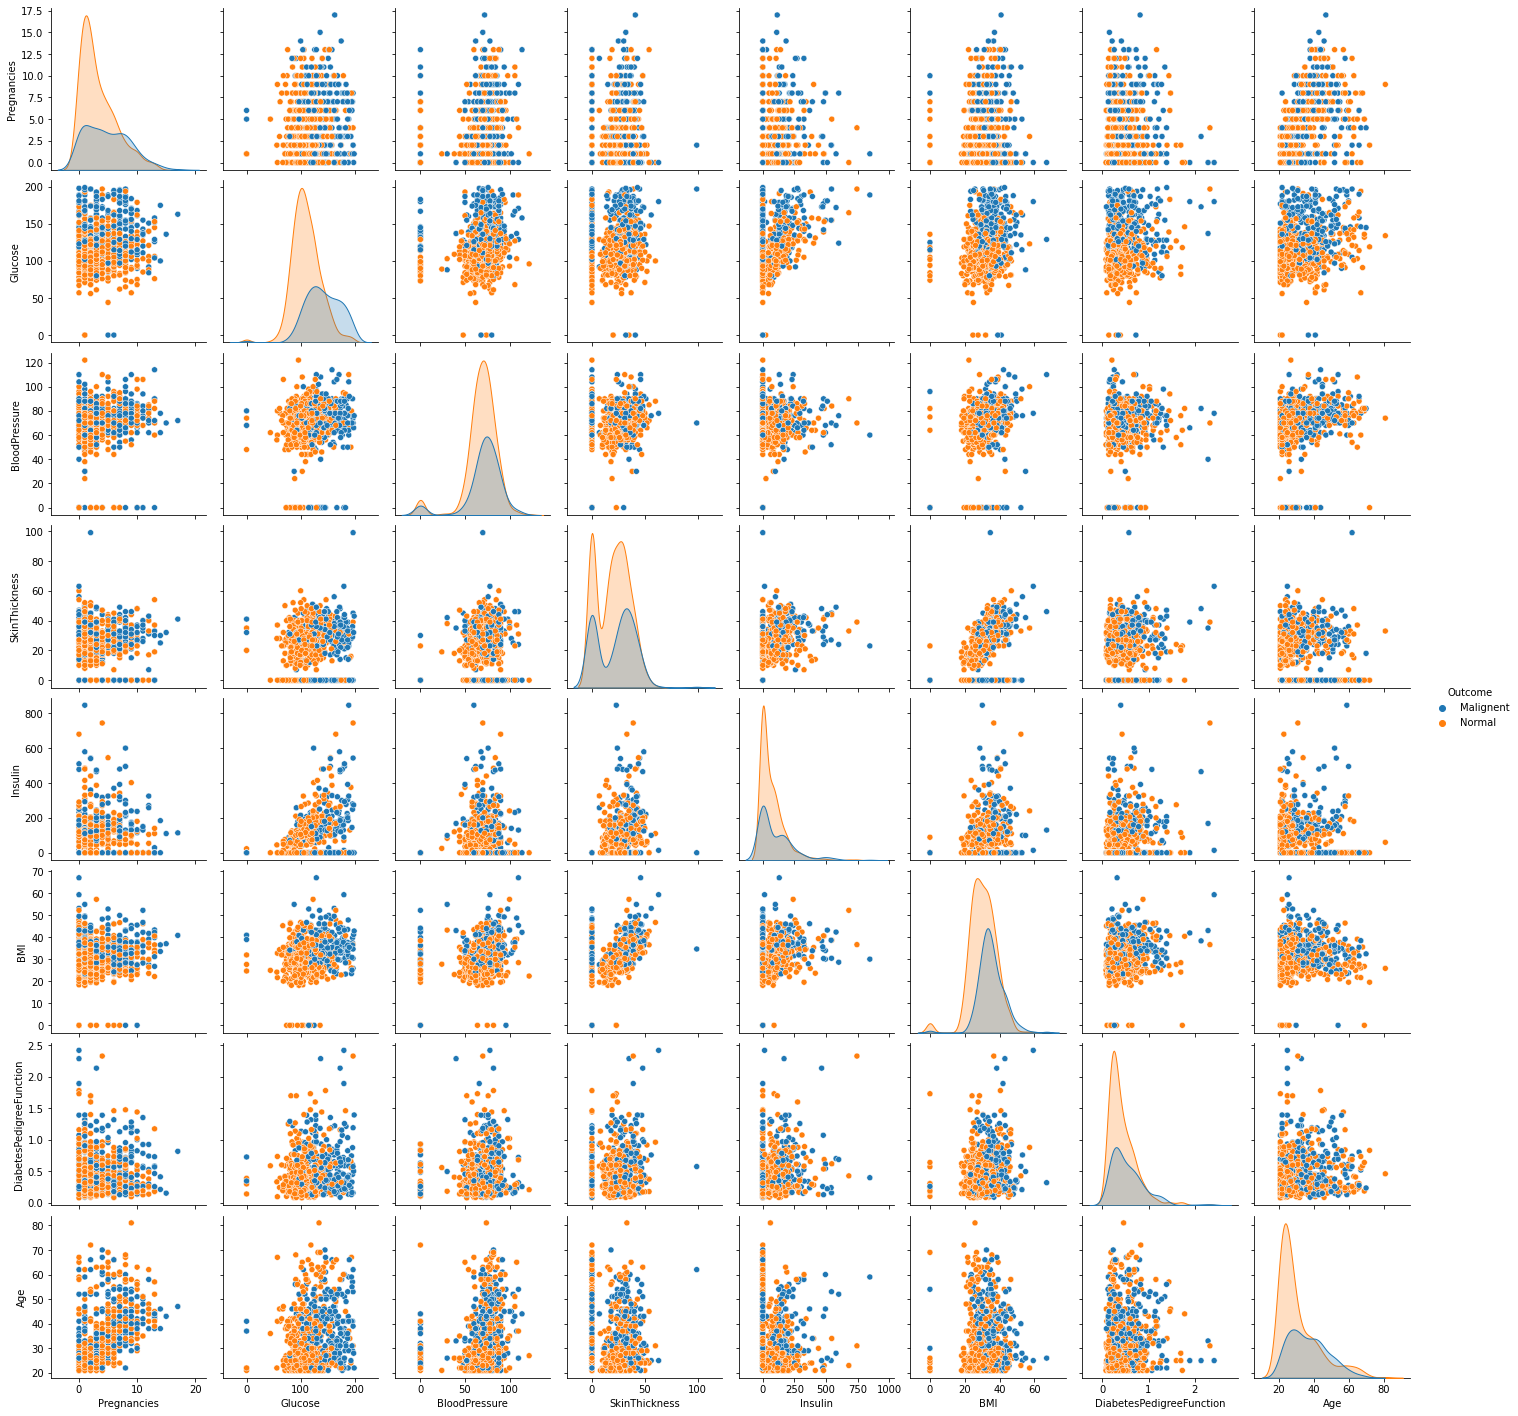

In [ ]:
#pairplot of the diabetes dataset
data_test = data
data_test['Outcome'] = data_test['Outcome'].replace({0: "Normal", 1: "Malignent"})
sns.pairplot(data_test, hue='Outcome')

### **4.2) Finding the Importance of Each Feature**


The purpose of the ExtraTreesClassifier is to fit several randomized decision trees into the data, and in this regard is a form of ensemble learning. Particularly, random splits of all observations are carried out to ensure that the model does not overfit the data. We have trained the model with 100 decision trees and then from the trained model, we have found the importance of each feature. 

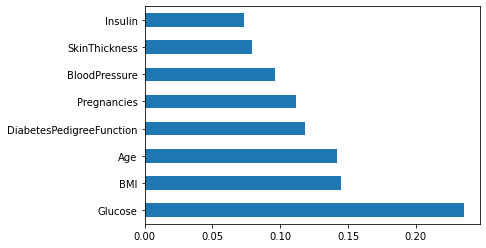

<Figure size 432x432 with 0 Axes>

In [ ]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.rcParams["figure.figsize"] = (6,6)
plt.figure(facecolor='orange')
plt.show()

### **4.3) Correlation Matrix**

A correlation matrix is simply a table that displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data. 

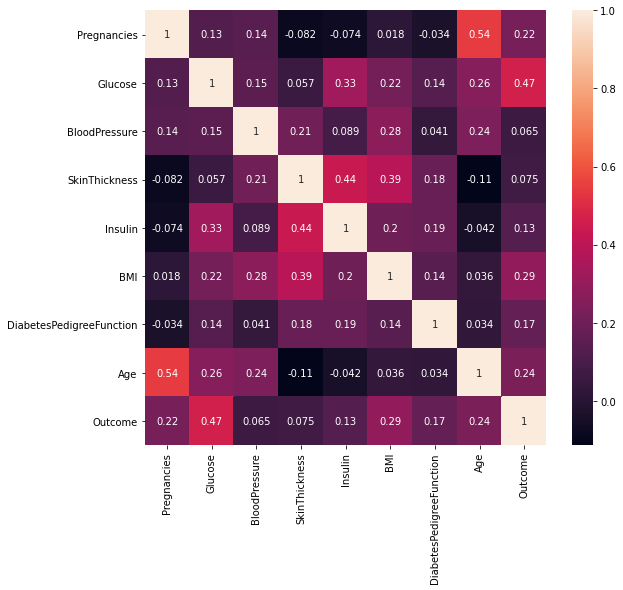

In [ ]:
'''
correlation matrix of the possum dataset, which shows the correlation 
of each feature with every other feature
'''

corr_matrix = data.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(9,8))

g = sns.heatmap(data[corr_features].corr(), annot=True)

## **5) Data Splitting**

In [ ]:
#splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_Standardized,y, random_state=20, test_size=0.20, stratify=y)

## **6) Machine Learning Algorithms**

In [ ]:
#global perimeters for camparisions 
accuracies_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])
precision_df = pd.DataFrame(columns=['Algorithm', 'Precision'])
recall_df = pd.DataFrame(columns=['Algorithm', 'Recall'])


### **6.1) Decesion Tree**

 **6.1.1) Hyperparamters Tuning**

In [ ]:
model = DecisionTreeClassifier()
space = dict()
space = {
       'criterion': ['gini', 'entropy'],
       'max_depth': [2,4,6,8,10,12,16,20],
       'min_samples_split': [2,4,6,10,20,30,40,100],
       'splitter': ['best', 'random'],
        }

classifier = GridSearchCV(model,space, cv=3, scoring='accuracy', n_jobs=-1,verbose=True)
classifier.fit(X_Standardized, y)

# summarize result
print('Best Score: %s' % classifier.best_score_)
print('Best Hyperparameters: %s' % classifier.best_params_)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.7604166666666666
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 40, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:    2.0s finished


**6.1.2) Training and Testing the model**

Model training started
Model successfully Trained
The time it takes to complete:  0.0  seconds
Train Accuracy:  0.8403908794788274
Test Accuracy:  0.7857142857142857
**************
**************


Plotting Confusion Matix for train data: 


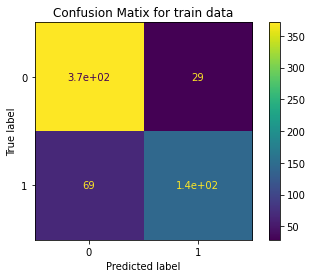


Plotting Confusion Matix for train data: 


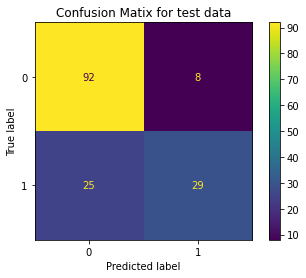


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       400
           1       0.83      0.68      0.75       214

    accuracy                           0.84       614
   macro avg       0.84      0.80      0.82       614
weighted avg       0.84      0.84      0.84       614


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154


Ploting ROC Curve for test data


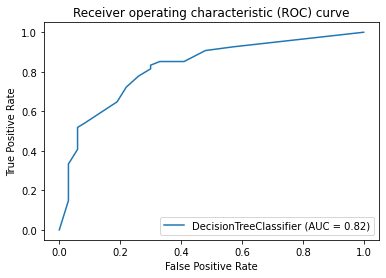


Ploting PR Curve for test data


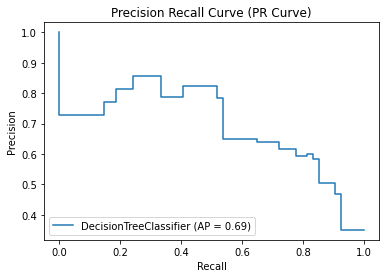

In [ ]:
#declaring the model
decisionTree_model = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=40, splitter='best')

print("Model training started")

#starting the timer
start_time = time.perf_counter()

#fitting the model
decisionTree_model.fit(X_train, y_train)

#stopping the timer
end_time = time.perf_counter()

#calcuate total time in seconds
print("Model successfully Trained")
print("The time it takes to complete: ", round(end_time - start_time, 2), " seconds")

y_predict_train = decisionTree_model.predict(X_train)
y_predict_test = decisionTree_model.predict(X_test)

train_score = accuracy_score(y_train, y_predict_train)
test_score = accuracy_score(y_test, y_predict_test)

print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)


print("**************")


list_ = precision_recall_fscore_support(y_test, y_predict_test, average='macro')
precision = list_[0]
recall = list_[1]


newRow1 = {'Algorithm':'Decisioin Tree', 'Accuracy': test_score }
newRow2 = {'Algorithm':'Decisioin Tree', 'Precision':precision }
newRow3 = {'Algorithm':'Decisioin Tree', 'Recall': recall}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)

print("**************\n")
print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(decisionTree_model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(decisionTree_model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()

print("Classification Report For Train Data: \n", classification_report(y_train, y_predict_train))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_predict_test))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(decisionTree_model, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(decisionTree_model, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

**6.1.3) Visulization of the Decision Tree Model**

In [ ]:
#visualizing the decision tree model
viz = dtreeviz(decisionTree_model, X, y, target_name="Outcome", feature_names=data.columns)
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [ ]:
viz.save("decision_tree.svg")

### **6.2) Random Forest**

**6.2.1) Hyperparamters Tuning for the Random Forest Classifer**

In [ ]:
model = RandomForestClassifier()
space = dict()
space = {
       'n_estimators': [100,200,400,600,800],
       'criterion': ['gini', 'entropy'],
       'max_depth': [2,4,6,8,10,12,16,20],
       'min_samples_split': [2,4,6,10,20,30],
        }

classifier = GridSearchCV(model,space, cv=3, scoring='accuracy', n_jobs=-1,verbose=True)
classifier.fit(X_Standardized, y)

# summarize result
print('Best Score: %s' % classifier.best_score_)
print('Best Hyperparameters: %s' % classifier.best_params_)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.7min finished


Best Score: 0.7786458333333334
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 30, 'n_estimators': 200}


**6.2.2) Training and Testing of the random forest classifier** *italicized text*

Model training started
Model successfully Trained
The time it takes to complete:  0.59  seconds
Train Accuracy:  0.8534201954397395
Test Accuracy:  0.7662337662337663
**************
**************


Plotting Confusion Matix for train data: 


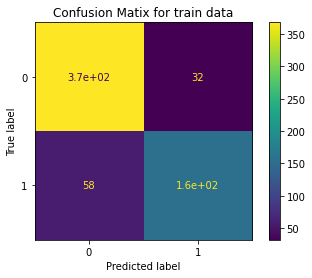


Plotting Confusion Matix for train data: 


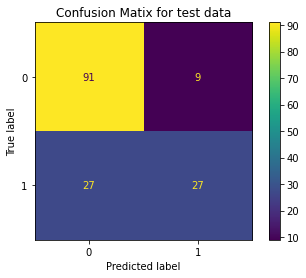


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       400
           1       0.83      0.73      0.78       214

    accuracy                           0.85       614
   macro avg       0.85      0.82      0.83       614
weighted avg       0.85      0.85      0.85       614


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154


Ploting ROC Curve for test data


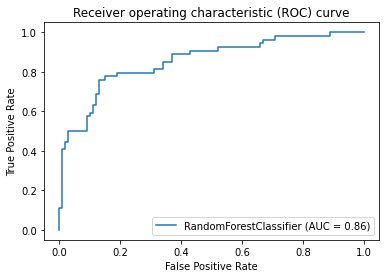


Ploting PR Curve for test data


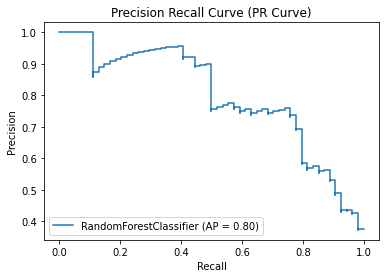

In [ ]:
#declaring the model
model = RandomForestClassifier(n_estimators=200, criterion='gini',max_depth=10,min_samples_split=30,  n_jobs=-1)

print("Model training started")

#starting the timer
start_time = time.perf_counter()

#fitting the model
model.fit(X_train, y_train)

#stopping the timer
end_time = time.perf_counter()

#calcuate total time in seconds
print("Model successfully Trained")
print("The time it takes to complete: ", round(end_time - start_time, 2), " seconds")

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

train_score = accuracy_score(y_train, y_predict_train)
test_score = accuracy_score(y_test, y_predict_test)

print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)

print("**************")


list_ = precision_recall_fscore_support(y_test, y_predict_test, average='macro')
precision = list_[0]
recall = list_[1]


newRow1 = {'Algorithm':'RF', 'Accuracy': test_score }
newRow2 = {'Algorithm':'RF', 'Precision':precision }
newRow3 = {'Algorithm':'RF', 'Recall': recall}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)

print("**************\n")


print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()


print("Classification Report For Train Data: \n", classification_report(y_train, y_predict_train))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_predict_test))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(model, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(model, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

### **6.3) K-Nearest Neighbours**

**6.3.1) Searching for the Optimal Value for the K**

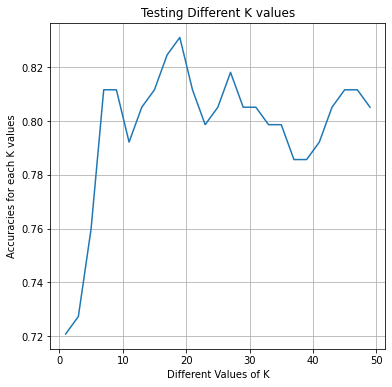

In [ ]:
#trying different values of K
K_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,33,35,37,39,41,43,45,47,49]
accuracies = []

for k in K_list:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_predict_test = model.predict(X_test)
  test_score = accuracy_score(y_test, y_predict_test)
  accuracies.append(test_score)

plt.title("Testing Different K values")
plt.xlabel("Different Values of K")
plt.ylabel("Accuracies for each K values")
plt.grid()
plt.plot(K_list, accuracies)
plt.show()



**6.3.2) Training and Testing of the K-Nearest Neighbors**

Model training started
Model successfully Trained
The time it takes to complete:  0.01  seconds
Train Accuracy:  0.750814332247557
Test Accuracy:  0.8311688311688312
**************
**************


Plotting Confusion Matix for train data: 


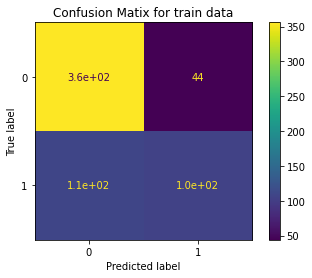


Plotting Confusion Matix for train data: 


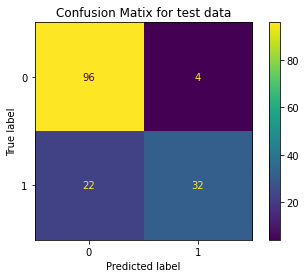


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       400
           1       0.70      0.49      0.58       214

    accuracy                           0.75       614
   macro avg       0.74      0.69      0.70       614
weighted avg       0.74      0.75      0.74       614


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       100
           1       0.89      0.59      0.71        54

    accuracy                           0.83       154
   macro avg       0.85      0.78      0.80       154
weighted avg       0.84      0.83      0.82       154


Ploting ROC Curve for test data


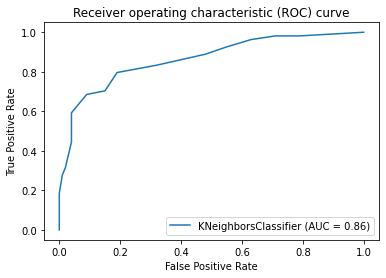


Ploting PR Curve for test data


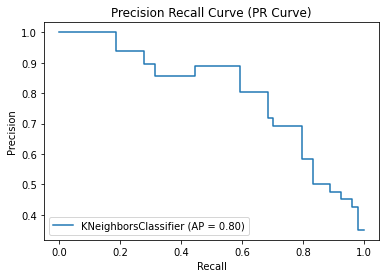

In [ ]:
#declaring the model
model = KNeighborsClassifier(n_neighbors=19)
print("Model training started")

#starting the timer
start_time = time.perf_counter()

#fitting the model
model.fit(X_train, y_train)

#stopping the timer
end_time = time.perf_counter()

#calcuate total time in seconds
print("Model successfully Trained")
print("The time it takes to complete: ", round(end_time - start_time, 2), " seconds")

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

train_score = accuracy_score(y_train, y_predict_train)
test_score = accuracy_score(y_test, y_predict_test)

print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)

print("**************")


list_ = precision_recall_fscore_support(y_test, y_predict_test, average='macro')
precision = list_[0]
recall = list_[1]


newRow1 = {'Algorithm':'KNN(3)', 'Accuracy': test_score }
newRow2 = {'Algorithm':'KNN(3)', 'Precision':precision }
newRow3 = {'Algorithm':'KNN(3)', 'Recall': recall}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)

print("**************\n")


print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()


print("Classification Report For Train Data: \n", classification_report(y_train, y_predict_train))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_predict_test))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(model, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(model, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

## **7) Deep Learning Algorithms**

### **7.1) Multilayer Artificial Neural Networks**

**7.1.1) Hyperparameters Tuning of the Multilayer Artificial Neural Network**

In [ ]:
model = MLPClassifier()
space = dict()
space = {
       'hidden_layer_sizes': [(8,16,8), (8,16,32,16,8)],
       'activation': ['tanh', 'logistic', 'relu'],
       'solver': ['sgd', 'adam', 'lbfgs'],
       'tol': [0.0001,0.00001],
       'max_iter': [10000,100000]
        }

classifier = GridSearchCV(model,space, cv=3, scoring='accuracy', n_jobs=-1,verbose=True)
classifier.fit(X_Standardized, y)

# summarize result
print('Best Score: %s' % classifier.best_score_)
print('Best Hyperparameters: %s' % classifier.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 19.6min finished


Best Score: 0.7721354166666666
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (8, 16, 8), 'max_iter': 10000, 'solver': 'sgd', 'tol': 0.0001}


**7.1.2) Training and Testing of the Multilayer Artificial Neural Network**

Model training started
Iteration 1, loss = 0.75640210
Iteration 2, loss = 0.75283196
Iteration 3, loss = 0.74752830
Iteration 4, loss = 0.74161122
Iteration 5, loss = 0.73503713
Iteration 6, loss = 0.72840485
Iteration 7, loss = 0.72168299
Iteration 8, loss = 0.71580998
Iteration 9, loss = 0.70989937
Iteration 10, loss = 0.70449534
Iteration 11, loss = 0.69924810
Iteration 12, loss = 0.69455798
Iteration 13, loss = 0.68993513
Iteration 14, loss = 0.68579440
Iteration 15, loss = 0.68215229
Iteration 16, loss = 0.67859385
Iteration 17, loss = 0.67529051
Iteration 18, loss = 0.67193697
Iteration 19, loss = 0.66890906
Iteration 20, loss = 0.66604708
Iteration 21, loss = 0.66324679
Iteration 22, loss = 0.66061700
Iteration 23, loss = 0.65803290
Iteration 24, loss = 0.65572778
Iteration 25, loss = 0.65377977
Iteration 26, loss = 0.65173492
Iteration 27, loss = 0.64978778
Iteration 28, loss = 0.64790107
Iteration 29, loss = 0.64616843
Iteration 30, loss = 0.64450720
Iteration 31, loss = 0.642

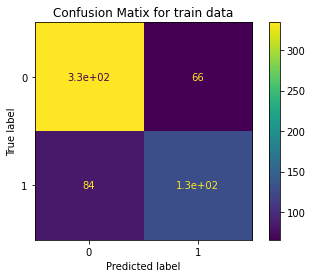


Plotting Confusion Matix for train data: 


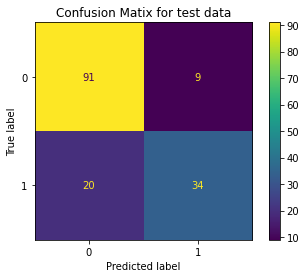


Classification Report For Train Data: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       400
           1       0.66      0.61      0.63       214

    accuracy                           0.76       614
   macro avg       0.73      0.72      0.73       614
weighted avg       0.75      0.76      0.75       614


Classification Report For Test Data: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       100
           1       0.79      0.63      0.70        54

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154


Ploting ROC Curve for test data


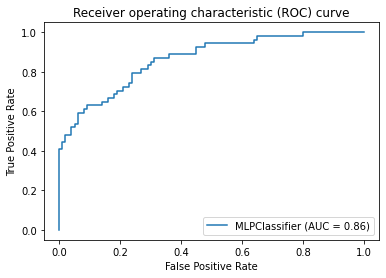


Ploting PR Curve for test data


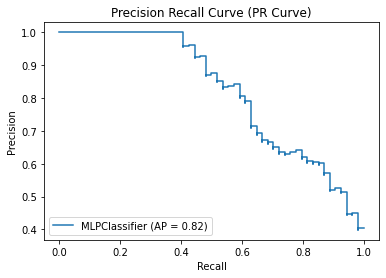

In [ ]:
#declaring the model
model = MLPClassifier(hidden_layer_sizes=(8, 16, 8), activation='tanh', solver='sgd', 
                       max_iter=10000, tol=0.0001, verbose=True )
print("Model training started")

#starting the timer
start_time = time.perf_counter()

#fitting the model
model.fit(X_train, y_train)

#stopping the timer
end_time = time.perf_counter()

#calcuate total time in seconds
print("Model successfully Trained")
print("The time it takes to complete: ", round(end_time - start_time, 2), " seconds")

y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

train_score = accuracy_score(y_train, y_predict_train)
test_score = accuracy_score(y_test, y_predict_test)

print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)


print("**************")


list_ = precision_recall_fscore_support(y_test, y_predict_test, average='macro')
precision = list_[0]
recall = list_[1]


newRow1 = {'Algorithm':'Multilayer ANN', 'Accuracy': test_score }
newRow2 = {'Algorithm':'Multilayer ANN', 'Precision':precision }
newRow3 = {'Algorithm':'Multilayer ANN', 'Recall': recall}

accuracies_df = accuracies_df.append(newRow1, ignore_index=True)
precision_df = precision_df.append(newRow2, ignore_index=True)
recall_df = recall_df.append(newRow3, ignore_index=True)

print("**************\n")




print()

print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()
print()


print("Plotting Confusion Matix for train data: ")
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()
print()


print("Classification Report For Train Data: \n", classification_report(y_train, y_predict_train))
print()

print("Classification Report For Test Data: \n", classification_report(y_test, y_predict_test))
print()

#Receiver operating characteristic (ROC) curve
print("Ploting ROC Curve for test data")
plot_roc_curve(model, X_test, y_test)
plt.title("Receiver operating characteristic (ROC) curve")
plt.show()

print()

#Precision Recall Curve (PR Curve)
print("Ploting PR Curve for test data")
plot_precision_recall_curve(model, X_test, y_test)
plt.title("Precision Recall Curve (PR Curve)")
plt.show()

## **8) Overall models evaluation and comparisons**

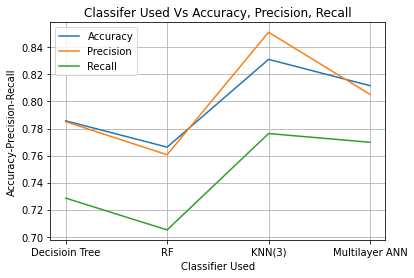

In [ ]:
#plotting the accuracies vs classifier used 
plt.plot(accuracies_df['Algorithm'], accuracies_df['Accuracy'], label='Accuracy', color='tab:blue')
plt.plot(precision_df['Algorithm'], precision_df['Precision'], label='Precision',color='tab:orange')
plt.plot(recall_df['Algorithm'], recall_df['Recall'],label='Recall', color='tab:green')

plt.xlabel("Classifier Used")
plt.ylabel("Accuracy-Precision-Recall")
plt.title("Classifer Used Vs Accuracy, Precision, Recall")
plt.legend()
plt.grid()
plt.show()

In [ ]:
  result = pd.concat([accuracies_df['Algorithm'], accuracies_df['Accuracy'], recall_df['Recall'], precision_df['Precision']],
                     axis=1)
  result

Algorithm  Accuracy    Recall  Precision
0  Decisioin Tree  0.785714  0.728519   0.785054
1              RF  0.766234  0.705000   0.760593
2          KNN(3)  0.831169  0.776296   0.851224
3  Multilayer ANN  0.811688  0.769815   0.805259